# Redes Neuronales - Dataset Idealista Madrid

En esta practica vamos a ver cómo crear un modelo de **redes neuronales** para poder predecir el valor de una vivienda, teniendo en cuenta datos de la página *Idealista* en Madrid.

## Paso 1: Descargar el dataset

Primeramente, vamos a descargar este dataset desde la página de *Kaggle*, para poder trabajar con él. El enlace es el siguiente

[Dataset](https://www.kaggle.com/datasets/kanchana1990/madrid-idealista-property-listings)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kanchana1990/madrid-idealista-property-listings")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

In [3]:
import pandas as pd
import os

path="."

# List files in the directory to find CSV files
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]
print("Available CSV files:", csv_files)

# Assuming there's a main CSV file we want to read
# If there are multiple files, you may need to select the specific one you want
if csv_files:
    file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(file_path)
    print(f"Loaded {csv_files[0]}")
    print(f"Shape: {df.shape}")
    display(df.head())
else:
    print("No CSV files found in the directory.")

Available CSV files: ['idealista_madrid.csv']
Loaded idealista_madrid.csv
Shape: (915, 13)


,url,listingUrl,title,id,price,baths,rooms,sqft,description,address,typology,advertiserProfessionalName,advertiserName
0,https://www.idealista.com/inmueble/104027174/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Villanueva,104027174,1920000,3,3,183,Residencia única con acabados de la más alta c...,"Recoletos, Madrid",Pisos,Promora Madrid,Promora Madrid
1,https://www.idealista.com/inmueble/102321942/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Núñez de Balboa,102321942,1995000,3,3,170,"Preciosa reforma a estrenar, con terrazas y ga...","Castellana, Madrid",Pisos,Madrid MMC,Engel & Völkers Madrid
2,https://www.idealista.com/inmueble/103334142/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Conde Orgaz-Piovera,103334142,1300000,3,4,270,DE SALAS CONSULTORES INMOBILIARIOS MAV02679 le...,"Hortaleza, Madrid",Pisos,De Salas Consultores Inmobiliarios,De Salas Consultores Inmobiliarios
3,https://www.idealista.com/inmueble/104161987/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Nueva España,104161987,1650000,3,3,248,Gilmar Real Estate vende espectacular piso en ...,"Chamartín, Madrid",Pisos,departamento comercial,Gilmar Viso - Chamartín
4,https://www.idealista.com/inmueble/103989666/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Claudio Coello,103989666,1590750,3,3,116,Descubre esta impresionante vivienda exterior ...,"Recoletos, Madrid",Pisos,Walter Haus Salamanca,Walter Haus Madrid


## Paso 2: Visualización de los datos

In [ ]:
# Ver los valores mínimos y máximos de cada variable
print(df[['price', 'baths', 'rooms', 'sqft']].describe())



              price       baths       rooms         sqft
count  9.150000e+02  915.000000  915.000000   915.000000
mean   1.290575e+06    2.900546    3.474317   217.238251
std    1.036640e+06    1.626487    1.594625   191.745826
min    1.220000e+05    1.000000    0.000000    14.000000
25%    6.250000e+05    2.000000    2.000000   104.000000
50%    9.900000e+05    3.000000    3.000000   158.000000
75%    1.650000e+06    4.000000    4.000000   264.000000
max    8.900000e+06   12.000000   12.000000  1768.000000


## Paso 3: Limpieza de los datos

In [ ]:
df = df[['baths', 'rooms', 'address', 'sqft', 'typology', 'price']]

df['neighborhood'] = df['address'].str.split(',').str[0]
df = df.drop(columns=['address'])

df.head()

,baths,rooms,sqft,typology,price,neighborhood
0,3,3,183,Pisos,1920000,Recoletos
1,3,3,170,Pisos,1995000,Castellana
2,3,4,270,Pisos,1300000,Hortaleza
3,3,3,248,Pisos,1650000,Chamartín
4,3,3,116,Pisos,1590750,Recoletos


In [ ]:
# Verificar valores nulos
print("Valores nulos en el dataset:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Valores nulos en el dataset:
Series([], dtype: int64)


In [ ]:
df = df[
    (df['price'] > 0) &
    (df['baths'] > 0) &
    (df['rooms'] > 0) &
    (df['sqft'] > 10) &
    (df['neighborhood'].notnull()) &
    (df['typology'].notnull()) 
]

df = df[(df["price"] < 3000000)]

### Visualizamos la distribución

C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_13188\2915125772.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='baths', data=df, ax=axes[0, 1], palette='viridis')
C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_13188\2915125772.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rooms', data=df, ax=axes[1, 0], palette='magma')


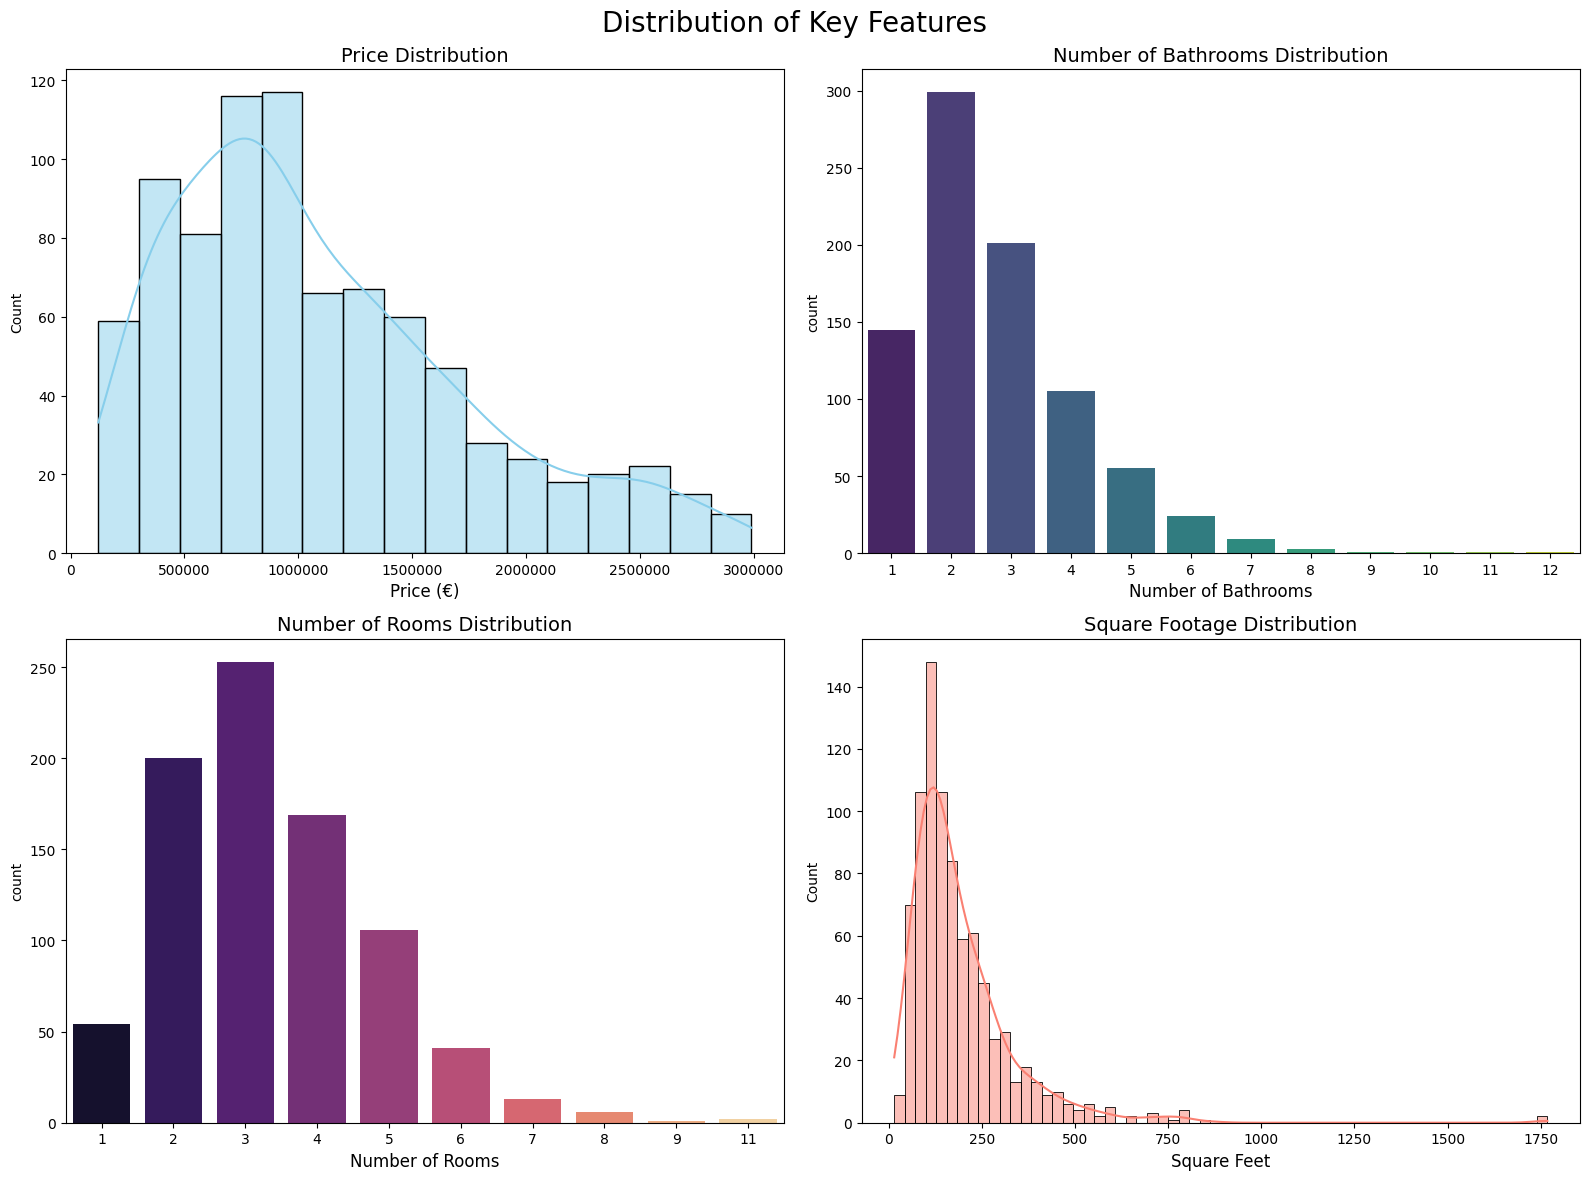

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Features', fontsize=20, y=0.98)

# Plot price distribution
sns.histplot(df['price'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Price Distribution', fontsize=14)
axes[0, 0].set_xlabel('Price (€)', fontsize=12)
axes[0, 0].ticklabel_format(style='plain', axis='x')

# Plot baths distribution
sns.countplot(x='baths', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Number of Bathrooms Distribution', fontsize=14)
axes[0, 1].set_xlabel('Number of Bathrooms', fontsize=12)

# Plot rooms distribution
sns.countplot(x='rooms', data=df, ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Number of Rooms Distribution', fontsize=14)
axes[1, 0].set_xlabel('Number of Rooms', fontsize=12)

# Plot sqft distribution
sns.histplot(df['sqft'], kde=True, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Square Footage Distribution', fontsize=14)
axes[1, 1].set_xlabel('Square Feet', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

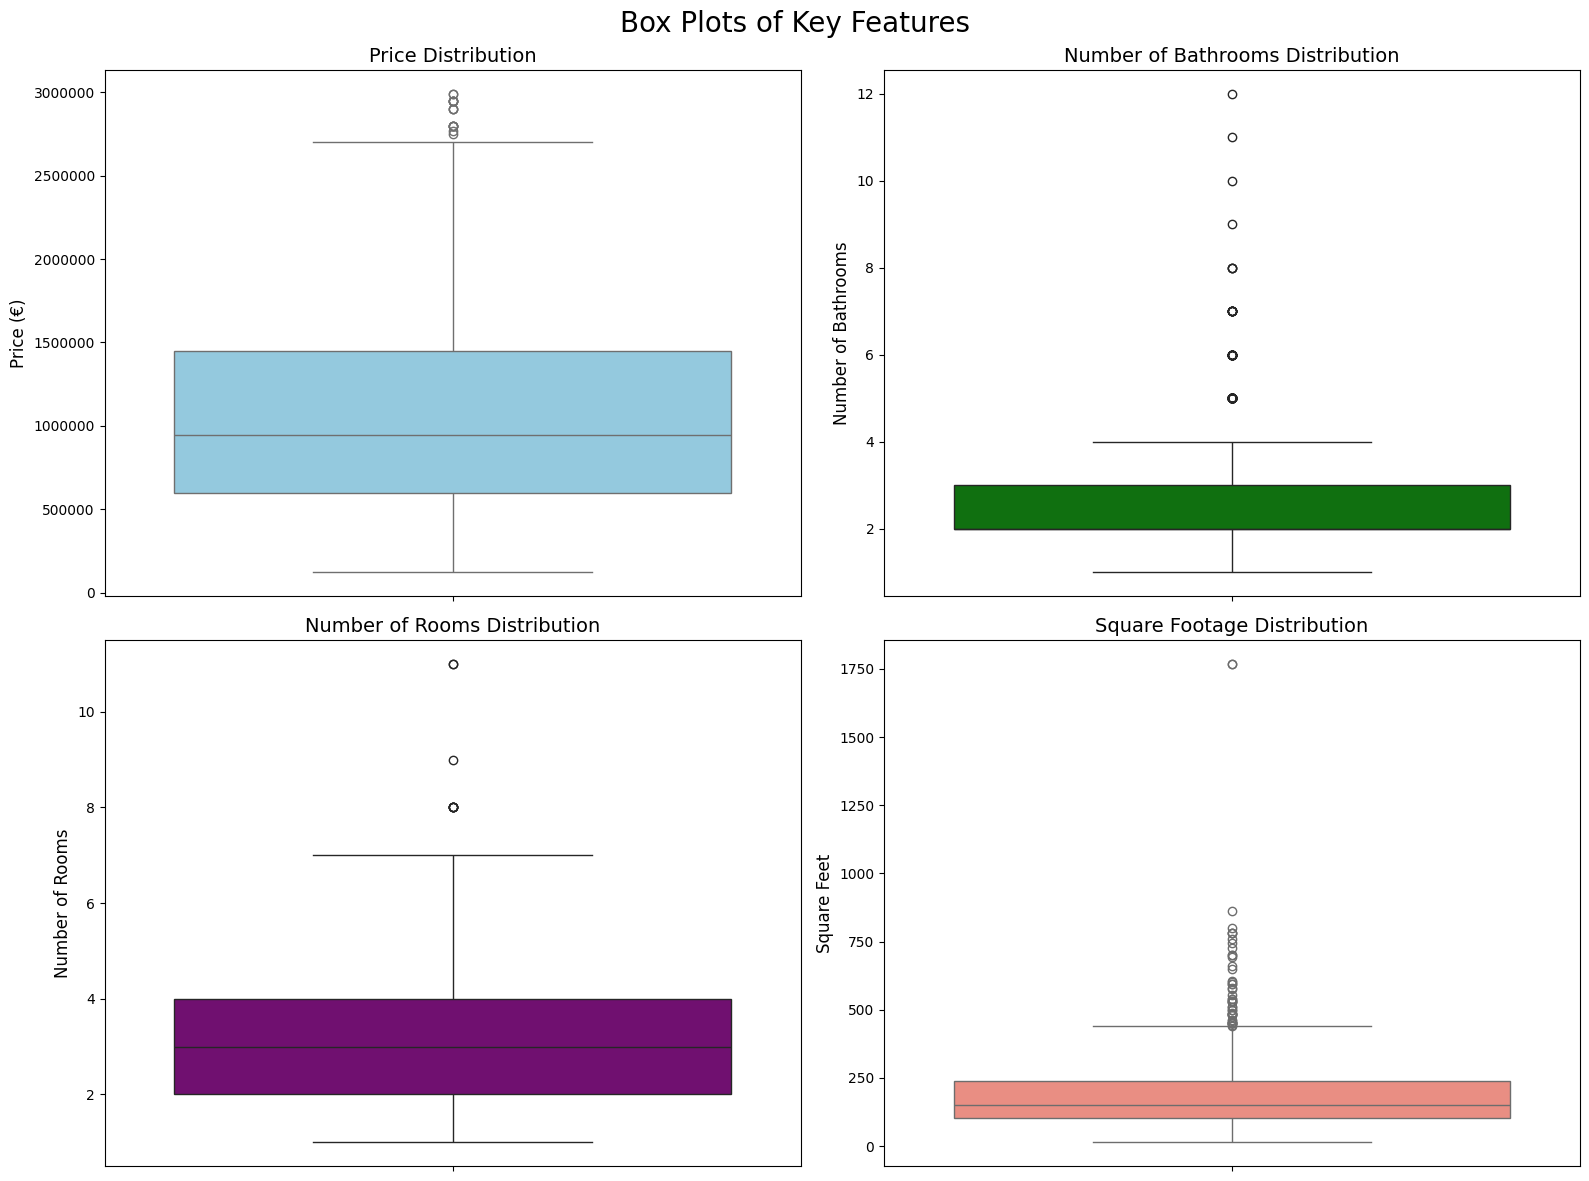

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Box Plots of Key Features', fontsize=20, y=0.98)

# Plot price box plot
sns.boxplot(y=df['price'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Price Distribution', fontsize=14)
axes[0, 0].set_ylabel('Price (€)', fontsize=12)
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Plot baths box plot
sns.boxplot(y=df['baths'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Number of Bathrooms Distribution', fontsize=14)
axes[0, 1].set_ylabel('Number of Bathrooms', fontsize=12)

# Plot rooms box plot
sns.boxplot(y=df['rooms'], ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Number of Rooms Distribution', fontsize=14)
axes[1, 0].set_ylabel('Number of Rooms', fontsize=12)

# Plot sqft box plot
sns.boxplot(y=df['sqft'], ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Square Footage Distribution', fontsize=14)
axes[1, 1].set_ylabel('Square Feet', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

Una vez hemos visualizado los datos, vamos a pensar en cuáles de todos estos datos nos son verdaderamente útiles. Esta determinación viene principalmente con el pensamiento crítico de entender qué es lo realmente importante a la hora de crear y entrenar el modelo, por lo que, desde mi punto de vista estos son los campos clave:

- `price`

- `baths`

- `rooms`

- `address`

- `sqft`

- `typology`

Entre ellos, tenemos que entender que el campo `price` es el campo a predecir, por lo tanto lo asignaremos como `label` y el resto como `features`

In [ ]:
features = df.drop('price', axis=1).copy()

label = df['price'].copy()

print("Features shape:", features.shape)
print("Label shape:", label.shape)

Features shape: (845, 5)
Label shape: (845,)


In [ ]:
features.head()

,baths,rooms,sqft,typology,neighborhood
0,3,3,183,Pisos,Recoletos
1,3,3,170,Pisos,Castellana
2,3,4,270,Pisos,Hortaleza
3,3,3,248,Pisos,Chamartín
4,3,3,116,Pisos,Recoletos


In [ ]:
unique_neighborhoods = features['neighborhood'].nunique()
neighborhood_counts = features['neighborhood'].value_counts()

# Print summary
print(f"Total number of distinct neighborhoods: {unique_neighborhoods}")
print("\nNeighborhood distribution:")
print(neighborhood_counts)

Total number of distinct neighborhoods: 104

Neighborhood distribution:
neighborhood
Barrio de Salamanca           56
Hortaleza                     53
Centro                        46
Chamartín                     45
Moncloa                       43
                              ..
Casco Histórico de Barajas     1
El Plantío                     1
Arganzuela                     1
Canillejas                     1
San Juan Bautista              1
Name: count, Length: 104, dtype: int64


## Feature engineering

In [ ]:
import numpy as np

# Feature Engineering

def feature_engineering(x):
    """
    Realiza ingeniería de características en el DataFrame dado.
    """
    # Crear una copia del DataFrame original
    features = x.copy()
    # 3. Space per room
    features['sqft_per_room'] = df['sqft'] / df['rooms']

    features['sqft_per_bath'] = df['sqft'] / df['baths']

    features["bath_to_room_ratio"] = df["baths"] / df["rooms"]

    features["sqft_rooms_interaction"] = df["sqft"] * df["rooms"]

    features["luxury_score"] = (df["sqft"] * features["bath_to_room_ratio"]) / df["rooms"]

    # 4. Total rooms (bathrooms + bedrooms)
    features['total_rooms'] = df['rooms'] + df['baths']

    # 5. Is luxury property (based on percentiles)

    size_threshold = np.percentile(df['sqft'], 75)
    features['is_luxury'] = ((df['sqft'] > size_threshold)).astype(int)

    # 6. Neighborhood statistics
    neighborhood_avg = df.groupby('neighborhood')['price'].mean().to_dict()
    neighborhood_median = df.groupby('neighborhood')['price'].median().to_dict()

    features['neighborhood_price_avg'] = df['neighborhood'].map(neighborhood_avg)
    features["neighborhood_price_median"] = df["neighborhood"].map(neighborhood_median)

    features["avg_sqft_neighborhood "] = df["neighborhood"].map(df.groupby("neighborhood")["sqft"].mean())
    features["avg_rooms_neighborhood "] = df["neighborhood"].map(df.groupby("neighborhood")["rooms"].mean())

    features["neighborhood_density"] = features["neighborhood_price_median"] / df["sqft"]
    # 9. Room density (rooms per 100 sqft)
    features['room_density'] = (df['rooms'] / df['sqft']) * 100

    features["log_sqft"] = np.log1p(df["sqft"])

    features["log_neighborhood_price_avg"] = np.log1p(features["neighborhood_price_avg"])

    features["log_neighborhood_price_median"] = np.log1p(features["neighborhood_price_median"])

    features["typology"] = features["typology"] == "Pisos"

    features = features.drop(columns=["neighborhood"])

    return features

features = feature_engineering(features)
# Display new features
print(f"Features shape after engineering: {features.shape}")
features.head()

Features shape after engineering: (845, 20)


,baths,rooms,sqft,typology,sqft_per_room,sqft_per_bath,bath_to_room_ratio,sqft_rooms_interaction,luxury_score,total_rooms,is_luxury,neighborhood_price_avg,neighborhood_price_median,avg_sqft_neighborhood,avg_rooms_neighborhood,neighborhood_density,room_density,log_sqft,log_neighborhood_price_avg,log_neighborhood_price_median
0,3,3,183,True,61.000000,61.000000,1.00,549,61.000000,6,0,1.611917e+06,1598000.0,144.933333,2.733333,8732.240437,1.639344,5.214936,14.292935,14.284264
1,3,3,170,True,56.666667,56.666667,1.00,510,56.666667,6,0,1.549214e+06,1450000.0,163.714286,3.071429,8529.411765,1.764706,5.141664,14.253259,14.187075
2,3,4,270,True,67.500000,90.000000,0.75,1080,50.625000,7,1,1.395830e+06,1495000.0,311.264151,4.301887,5537.037037,1.481481,5.602119,14.149001,14.217637
3,3,3,248,True,82.666667,82.666667,1.00,744,82.666667,6,1,1.458556e+06,1490000.0,214.488889,3.800000,6008.064516,1.209677,5.517453,14.192958,14.214287
4,3,3,116,True,38.666667,38.666667,1.00,348,38.666667,6,0,1.611917e+06,1598000.0,144.933333,2.733333,13775.862069,2.586207,4.762174,14.292935,14.284264


## Normalizando los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_features(x):
    features = x.copy()

    scaler = StandardScaler()

    columns_to_normalize = [
        # Original numerical features
        'rooms', 'baths', 'sqft',
        
        # Price-related features
        'neighborhood_price_avg', "neighborhood_price_median", "luxury_score", "neighborhood_density",
        
        # Ratio features
        'sqft_per_room', 'room_density', "sqft_per_bath", "sqft_rooms_interaction", "bath_to_room_ratio",

        # log values
        'log_sqft', "log_neighborhood_price_avg", "log_neighborhood_price_median",

        "avg_sqft_neighborhood ", "avg_rooms_neighborhood ",
        
        # Count features
        'total_rooms'
    ]

    features[columns_to_normalize] = scaler.fit_transform(features[columns_to_normalize])

    return features


features = scale_features(features)

features.head()

,baths,rooms,sqft,typology,sqft_per_room,sqft_per_bath,bath_to_room_ratio,sqft_rooms_interaction,luxury_score,total_rooms,is_luxury,neighborhood_price_avg,neighborhood_price_median,avg_sqft_neighborhood,avg_rooms_neighborhood,neighborhood_density,room_density,log_sqft,log_neighborhood_price_avg,log_neighborhood_price_median
0,0.178641,-0.243693,-0.064382,True,0.208845,-0.348430,0.601382,-0.235839,0.263195,-0.034100,0,1.283430,1.290269,-0.520587,-0.739530,0.351687,-0.558003,0.244767,1.002058,1.074040
1,0.178641,-0.243693,-0.151105,True,0.036428,-0.532983,0.601382,-0.272035,0.155779,-0.034100,0,1.127818,0.952795,-0.315691,-0.337354,0.309289,-0.398143,0.126234,0.919225,0.883264
2,0.178641,0.442709,0.516000,True,0.467471,0.886653,-0.311177,0.256990,0.006017,0.330642,1,0.747154,1.055405,1.294041,1.126321,-0.316223,-0.759309,0.871120,0.701561,0.943257
3,0.178641,-0.243693,0.369237,True,1.070932,0.574333,0.601382,-0.054856,0.800273,-0.034100,1,0.902824,1.044004,0.238247,0.529308,-0.217762,-1.105913,0.734154,0.793332,0.936681
4,0.178641,-0.243693,-0.511342,True,-0.679767,-1.299586,0.601382,-0.422389,-0.290409,-0.034100,0,1.283430,1.290269,-0.520587,-0.739530,1.405983,0.649432,-0.487673,1.002058,1.074040


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el scaler
scaler_price = MinMaxScaler()

def min_max_scaling(y):
    prices = y.copy()

    # Normalizar la columna 'price'
    prices = np.log1p(prices)

    label_scaled = scaler_price.fit_transform(prices.values.reshape(-1, 1))

    return label_scaled


# Al final tendrás el vector normalizado de precios
label_scaled = min_max_scaling(label)

print(label_scaled[:5])

[[0.86153546]
 [0.87351385]
 [0.73963465]
 [0.81416134]
 [0.80272975]]


Feature correlations with price (sorted):
price                            1.000000
log_sqft                         0.763103
baths                            0.725153
total_rooms                      0.684784
sqft                             0.670652
neighborhood_price_avg           0.612708
log_neighborhood_price_avg       0.585320
is_luxury                        0.581700
log_neighborhood_price_median    0.576028
neighborhood_price_median        0.575397
sqft_rooms_interaction           0.568395
rooms                            0.559958
sqft_per_room                    0.507764
luxury_score                     0.419864
avg_sqft_neighborhood            0.394054
avg_rooms_neighborhood           0.347531
bath_to_room_ratio               0.346667
sqft_per_bath                    0.276140
neighborhood_density            -0.292993
typology                        -0.366331
room_density                    -0.545874
Name: price, dtype: float64


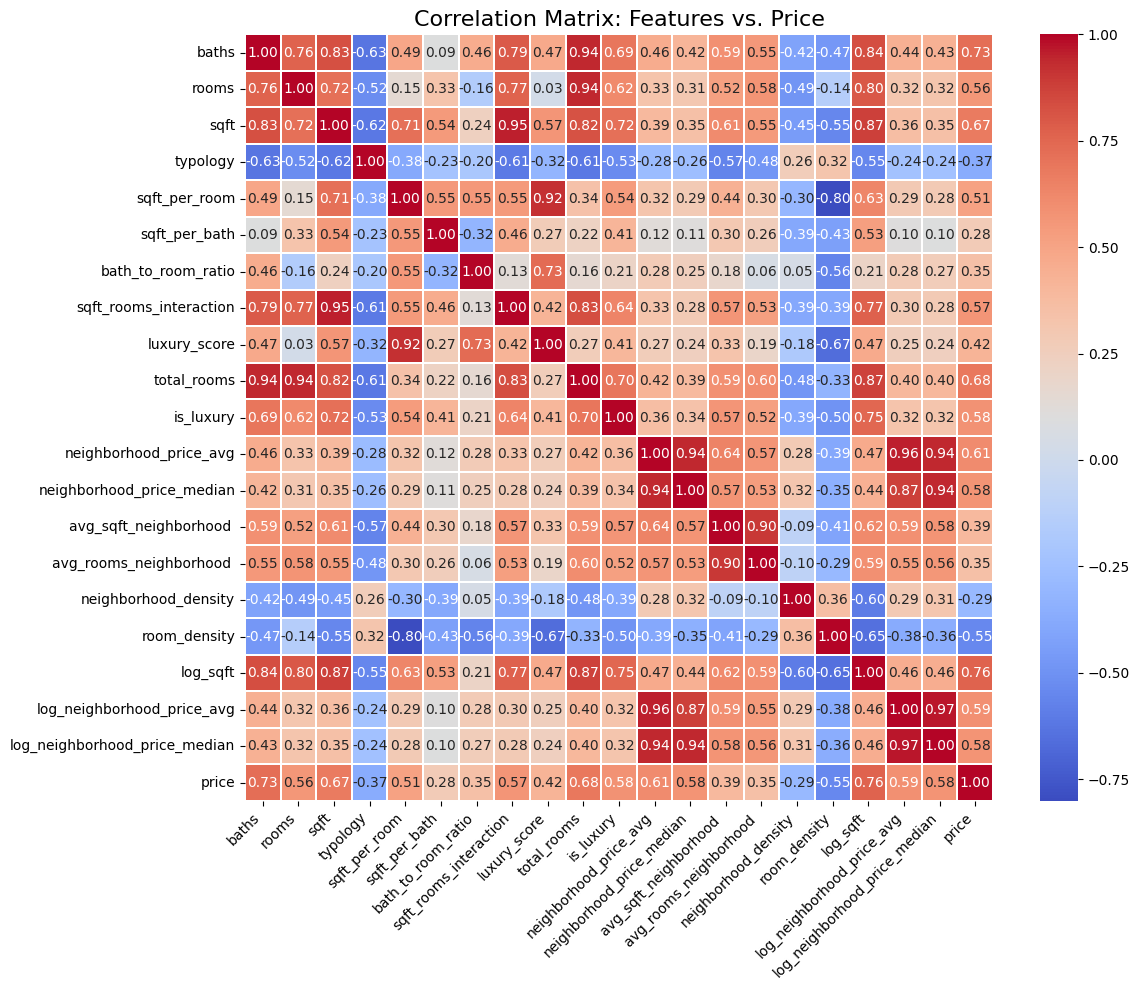

In [ ]:
# Create a copy of the features dataframe to avoid modifying the original
features_corr = features.copy()

columns_to_print = [col for col in features.columns]


# Combine numeric features with encoded categorical features
correlation_df = pd.concat([
    features_corr[columns_to_print],
    label
], axis=1)

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Create heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f',
            linewidths=0.2)
plt.title('Correlation Matrix: Features vs. Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Print correlations with price (sorted)
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("Feature correlations with price (sorted):")
print(price_correlations)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.regularizers import l2, l1_l2
import tensorflow.keras as keras

In [ ]:
print("features shape:", features.shape)
print("label_scaled shape:", label_scaled.shape)

features shape: (845, 20)
label_scaled shape: (845, 1)


In [ ]:
from sklearn.model_selection import train_test_split

_, X_test, _, y_test = train_test_split(features, label_scaled, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
test_indices = X_test.index

df_clean = df[~df.index.isin(test_indices)]

print(f"DataFrame original: {df.shape[0]} filas")
print(f"X_test: {X_test.shape[0]} filas")
print(f"DataFrame limpio: {df_clean.shape[0]} filas")
print(f"Filas removidas: {df.shape[0] - df_clean.shape[0]}")

df= df_clean

DataFrame original: 845 filas
X_test: 254 filas
DataFrame limpio: 591 filas
Filas removidas: 254


## Generación de datos sintéticos

Generamos algunos datos sintéticos, es decir, artificiales, para complementar el dataset y que pueda haber más balance y variedad. Esto es una de las técnicas más usadas en Machine Learning

In [ ]:
import smogn

print("Valores NaN en el DataFrame:")
print(df.isna().sum())

df_reset = df.reset_index(drop=True).copy()

df_smogn = smogn.smoter(
    data=df_reset, 
    y="price", 
    k=5,  # Número de vecinos a considerar
    samp_method="balance"  # Puede ser "balanceado" o "extremo"
)

df = pd.concat([df, df_smogn], axis=0)

Valores NaN en el DataFrame:
baths           0
rooms           0
sqft            0
typology        0
price           0
neighborhood    0
dtype: int64


r_index: 100%|##########| 46/46 [00:00<00:00, 884.55it/s]
c:\Users\Alumno_AI\Documents\hugoM\caso_estudio_entrenamiento\venv\Lib\site-packages\smogn\over_sampling.py:439: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      Pisos
1      Pisos
2        1.0
3        1.0
4      Pisos
       ...  
207    Pisos
208    Pisos
209    Pisos
210    Pisos
211      1.0
Name: 3, Length: 212, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_new.iloc[:, j] = data_new.iloc[:, j].replace(x, cat_list[x])
c:\Users\Alumno_AI\Documents\hugoM\caso_estudio_entrenamiento\venv\Lib\site-packages\smogn\over_sampling.py:439: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      Chamartín
1      Chamartín
2            1.0
3            1.0
4      Chamartín
         ...    
207          9.0
208          8.0
209    

In [ ]:
df_smogn.head()

,baths,rooms,sqft,typology,price,neighborhood
0,3.0,5.0,381.0,Pisos,1950000.0,Chamartín
1,3.0,4.0,317.0,Pisos,1834877.0,Chamartín
2,5.0,5.0,380.0,Independientes,1922077.0,Hortaleza
3,5.0,5.0,343.0,Independientes,1949360.0,Hortaleza
4,3.0,4.0,296.0,Pisos,2050602.0,Chamartín


Una vez tenemos estos datos generados, hay que aplicarle las mismas transformaciones que a los originales para que puedan combinarse y tener características y valores comunes

In [ ]:
df = df[
    (df['price'] > 0) &
    (df['baths'] > 0) &
    (df['rooms'] > 0) &
    (df['sqft'] > 10) &
    (df['neighborhood'].notnull()) &
    (df['typology'].notnull()) 
]

df = df[(df["price"] < 3000000)]

In [ ]:
new_features = df.drop('price', axis=1).copy()

new_labels = df['price'].copy()

new_features = feature_engineering(new_features)

features_ag = scale_features(new_features)

labels_ag = min_max_scaling(new_labels)

X_train = features_ag

y_train = labels_ag

print("features_ag shape:", features_ag.shape)
print("labels_ag shape:", labels_ag.shape)

features_ag shape: (1089, 20)
labels_ag shape: (1089, 1)


In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(features, label_scaled, test_size=0.2, random_state=42)

In [543]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, LeakyReLU, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

inputs = Input(shape=(X_train.shape[1],))

# Capa 1: 128 unidades
x = Dense(128, kernel_regularizer=l1_l2(l1=0.00001, l2=0.00001))(inputs)
x = LeakyReLU(negative_slope=0.1)(x)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)

# Capa 2: 64 unidades
x = Dense(64)(x)  # Residual connection
x = LeakyReLU(negative_slope=0.1)(x)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)

# Capa 3: 32 unidades
x = Dense(32)(x)
x = LeakyReLU(negative_slope=0.1)(x)
x = Dropout(0.1)(x)

# Capa 4: 16 unidades
x = Dense(16)(x)
x = LeakyReLU(negative_slope=0.1)(x)
x = Dropout(0.1)(x)



# Capa de salida
outputs = Dense(1, activation="linear")(x)

# Definir el modelo
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
from tensorflow.keras.losses import Huber, LogCosh

loss_function = LogCosh()  # Prueba también LogCosh()

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Learning rate ajustado
              loss=loss_function, 
              metrics=["mae"])

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)

model.fit(
    X_train, 
    y_train,
    epochs=350,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/350
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2550 - mae: 0.6414 - val_loss: 0.1562 - val_mae: 0.5330
Epoch 2/350
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1697 - mae: 0.4769 - val_loss: 0.1512 - val_mae: 0.5282
Epoch 3/350
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1118 - mae: 0.3852 - val_loss: 0.1439 - val_mae: 0.5157
Epoch 4/350
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0980 - mae: 0.3619 - val_loss: 0.1342 - val_mae: 0.4988
Epoch 5/350
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0845 - mae: 0.3256 - val_loss: 0.1196 - val_mae: 0.4685
Epoch 6/350
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0830 - mae: 0.3229 - val_loss: 0.1096 - val_mae: 0.4451
Epoch 7/350
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0737 - mae: 0.3018 - val_loss: 0.0976 - val_mae: 0.4181
Epoch 8/350
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0627 - mae: 0.2756 - val_loss: 0.0839 - val_mae: 0.3819
Epoch 9/350
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.05

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Convert predictions back to original scale

y_pred_original = np.expm1(scaler_price.inverse_transform(y_pred))
y_test_original = np.expm1(scaler_price.inverse_transform(y_test))

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

average_price = np.mean(y_test_original)

rmse_treshold = (rmse / average_price) * 100

print(f"RMSE: {rmse:.2f}")
print(f"RMSE threshold: {rmse_treshold:.2f}%")
print(f"R^2: {r2:.2f}")
print(f"Average price: {average_price:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE: 347866.86
RMSE threshold: 30.65%
R^2: 0.74
Average price: 1134796.16


In [ ]:
model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - mae: 0.0672 


[0.005930969957262278, 0.06973201781511307]

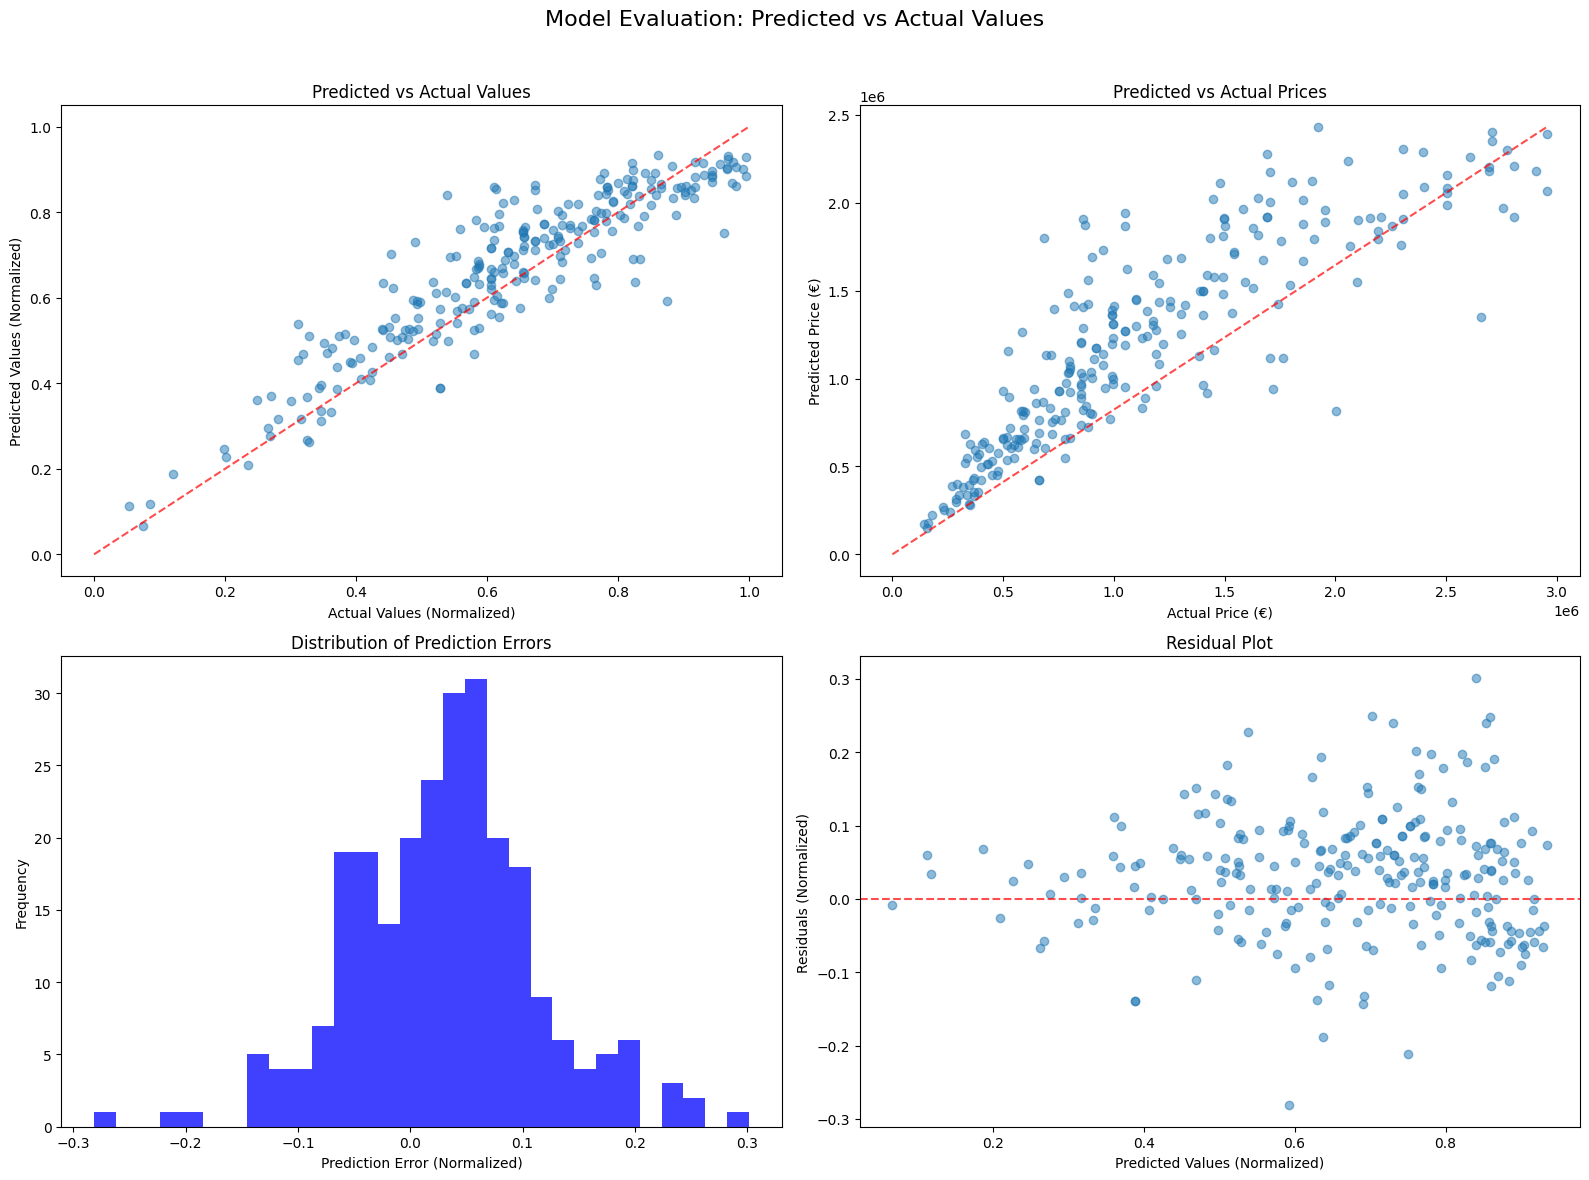

Error Statistics:
Mean Error: 0.0315441328786529
Standard Deviation of Error: 0.08370587220831147
Max Overestimation: 0.30156441281772706
Max Underestimation: -0.28147293405347584


In [ ]:
# Visualize model predictions vs actual values

# Create a figure with 3 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Evaluation: Predicted vs Actual Values', fontsize=16)

# 1. Scatter plot of predicted vs actual values
axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
axes[0, 0].plot([0, 1], [0, 1], 'r--', alpha=0.7)  # Diagonal line representing perfect predictions
axes[0, 0].set_xlabel('Actual Values (Normalized)')
axes[0, 0].set_ylabel('Predicted Values (Normalized)')
axes[0, 0].set_title('Predicted vs Actual Values')

# 2. Scatter plot with original price values (not normalized)
axes[0, 1].scatter(np.expm1(scaler_price.inverse_transform(y_test)), np.expm1(scaler_price.inverse_transform(y_pred)), alpha=0.5)
axes[0, 1].plot([0, max(np.expm1(scaler_price.inverse_transform(y_test)))[0]], [0, max(np.expm1(scaler_price.inverse_transform(y_pred)))[0]], 'r--', alpha=0.7) 
axes[0, 1].set_xlabel('Actual Price (€)')
axes[0, 1].set_ylabel('Predicted Price (€)')
axes[0, 1].set_title('Predicted vs Actual Prices')

# 3. Histogram of errors
errors = y_pred - y_test
axes[1, 0].hist(errors, bins=30, alpha=0.75, color='blue')
axes[1, 0].set_xlabel('Prediction Error (Normalized)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Prediction Errors')

# 4. Residual plot
axes[1, 1].scatter(y_pred, errors, alpha=0.5)
axes[1, 1].axhline(y=0, color='r', linestyle='--', alpha=0.7)
axes[1, 1].set_xlabel('Predicted Values (Normalized)')
axes[1, 1].set_ylabel('Residuals (Normalized)')
axes[1, 1].set_title('Residual Plot')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print summary statistics of errors
print("Error Statistics:")
print(f"Mean Error: {np.mean(errors)}")
print(f"Standard Deviation of Error: {np.std(errors)}")
print(f"Max Overestimation: {np.max(errors)}")
print(f"Max Underestimation: {np.min(errors)}")

In [ ]:
# Select one example from the test set
example_idx = 154  # You can change this to any index in the test set

# Get the features for this example and reshape for prediction
example_features = X_test[example_idx:example_idx+1]

# Make prediction using the trained model
example_pred = model.predict(example_features)

# Convert both prediction and actual value back to original scale
example_pred_orig = np.expm1(scaler_price.inverse_transform(example_pred))
example_actual_orig = np.expm1(scaler_price.inverse_transform(y_test[example_idx:example_idx+1]))

# Print the results
print(f"Example #{example_idx}:")
print(f"Predicted price: €{example_pred_orig[0][0]:,.2f}")
print(f"Actual price:    €{example_actual_orig[0][0]:,.2f}")
print(f"Difference:      €{example_actual_orig[0][0] - example_pred_orig[0][0]:,.2f}")
print(f"Error (%):       {((example_actual_orig[0][0] - example_pred_orig[0][0]) / example_actual_orig[0][0] * 100):,.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Example #154:
Predicted price: €1,137,093.50
Actual price:    €1,191,922.04
Difference:      €54,828.54
Error (%):       4.60%


In [ ]:
import os
import tensorflow as tf
from datetime import datetime

# Create a models directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the model
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_name = f"real_estate_price_predictor_{timestamp}"
model_path = os.path.join('models', model_name)

# Save in both SavedModel format and h5 format
model.save(f"{model_path}.keras") 


print(f"Model saved to {model_path}")

Model saved to models\real_estate_price_predictor_20250326_102642
